
Call:
glm(formula = Leukoplakia ~ factor(Alcohol) + factor(Smoker), 
    family = binomial(link = "logit"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9033  -1.1179   0.5974   0.9537   1.4694  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)   
(Intercept)      -0.08034    0.37488  -0.214  0.83031   
factor(Alcohol)2  0.63237    0.38896   1.626  0.10400   
factor(Alcohol)3 -0.06116    0.48852  -0.125  0.90038   
factor(Alcohol)4 -0.58411    0.72755  -0.803  0.42206   
factor(Smoker)1   1.08078    0.35051   3.083  0.00205 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 275.49  on 211  degrees of freedom
Residual deviance: 255.93  on 207  degrees of freedom
AIC: 265.93

Number of Fisher Scoring iterations: 4


       Smoker
Alcohol  0  1
      1 16 36
      2 67 46
      3 31  5
      4 10  1

1 
0.7189541

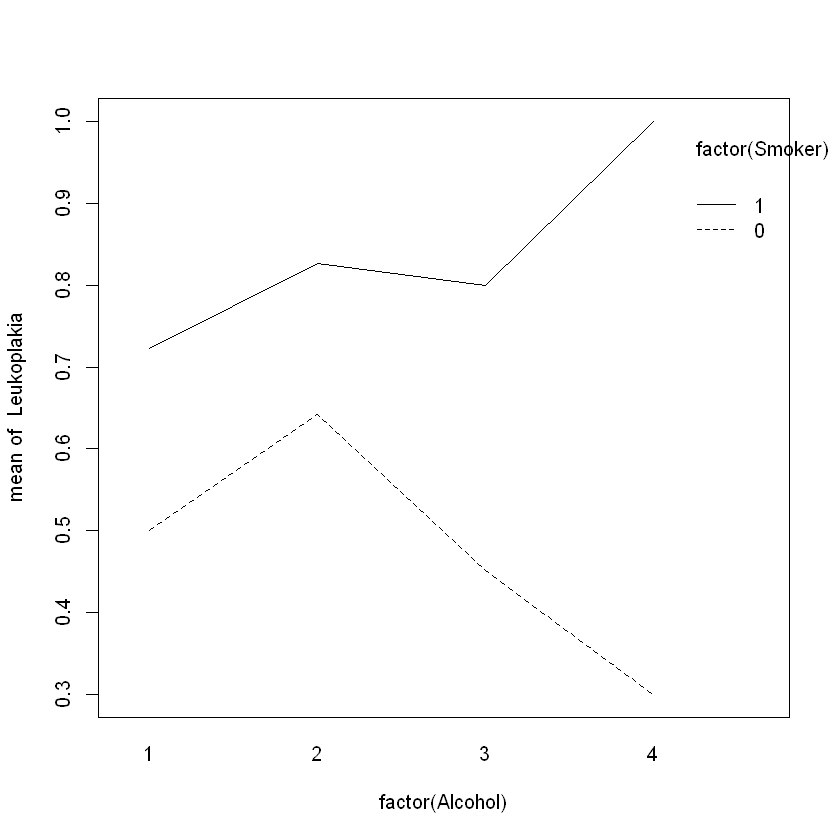

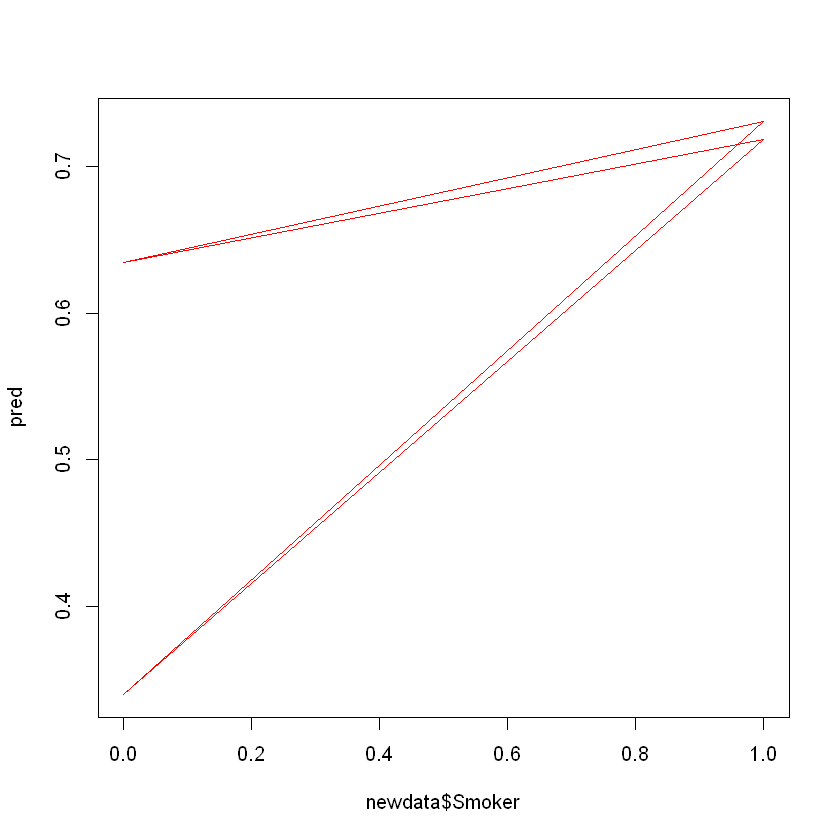

In [1]:
### Categorical Data Models


############################
### Assignment 4

### 1

data<-read.table("leukoplakia.txt", sep="\t", dec=".", header=TRUE)
attach(data)


## a)

model.main<-glm(Leukoplakia~factor(Alcohol)+factor(Smoker), family=binomial(link="logit"), data=data)
summary(model.main)

interaction.plot(factor(Alcohol), factor(Smoker), Leukoplakia)
table(Alcohol, Smoker)

newdata<-data.frame(Alcohol=3, Smoker=1)
predict(model.main, newdata=newdata, type="response") # 0.7189541 

newdata<-data.frame(Alcohol=rep(c(1,2,3,4), 10), Smoker=rep(c(1,0,1,0), 10))
pred<-predict(model.main, newdata=newdata, type="response")
plot(newdata$Smoker, pred, type="n")
lines(newdata$Smoker, pred, col="red", cex=1.5)


In [2]:
### b)

model.H0<-glm(Leukoplakia~factor(Alcohol), family=binomial(link="logit"), data=data)
summary(model.H0)

model.H1<-model.main
anova(model.H0, model.H1, test="Chi")
anova(model.H0, model.H1, test="Chi")$"Pr(>Chi)"[2] # p-value = 0.001429593
anova(model.H0, model.H1, test="Chi")$Deviance[2] # value of test statistic = 10.16722


Call:
glm(formula = Leukoplakia ~ factor(Alcohol), family = binomial(link = "logit"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5885  -1.1774   0.8160   0.9218   1.4224  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)  
(Intercept)        0.6360     0.2915   2.182   0.0291 *
factor(Alcohol)2   0.2927     0.3586   0.816   0.4143  
factor(Alcohol)3  -0.6360     0.4428  -1.436   0.1509  
factor(Alcohol)4  -1.1956     0.6912  -1.730   0.0837 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 275.49  on 211  degrees of freedom
Residual deviance: 266.09  on 208  degrees of freedom
AIC: 274.09

Number of Fisher Scoring iterations: 4


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,208,266.0924,NA,NA,NA
2,207,255.9252,1,10.16722,0.001429593


[1] 0.001429593

[1] 10.16722

In [5]:
### c)

newdata<-data.frame(Alcohol=c(4, 3), Smoker=c(1,1))
pred<-predict(model.main, newdata=newdata, type="response")
#          1         2 
# 0.6026026 0.7189541

predict.data<-data.frame(newdata,pred)

# Alcohol Smoker      pred
#       4      1 0.6026026
#       3      1 0.7189541

odd.ratio<-(0.6026026/(1-0.6026026)) / (0.7189541/(1-0.7189541)) # 0.5927643

pred
predict.data
odd.ratio

1         2 
0.6026026 0.7189541

,Alcohol,Smoker,pred
,<dbl>,<dbl>,<dbl>
1,4,1,0.6026026
2,3,1,0.7189541


[1] 0.5927643

In [6]:
### d)

model.quasiH0<-glm(Leukoplakia~factor(Alcohol)+factor(Smoker), family=quasibinomial(link="logit"), data=data)
summary(model.quasiH0)

model.quasiH1<-glm(Leukoplakia~factor(Alcohol)+factor(Smoker)+factor(Alcohol):factor(Smoker), 
                   family=quasibinomial(link="logit"), data=data)
summary(model.quasiH1)

anova(model.quasiH0, model.quasiH1, test="F")
anova(model.quasiH0, model.quasiH1, test="F")$"Pr(>F)"[2] # 0.7231551
anova(model.quasiH0, model.quasiH1, test="F")$F[2] # 0.442091



Call:
glm(formula = Leukoplakia ~ factor(Alcohol) + factor(Smoker), 
    family = quasibinomial(link = "logit"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9033  -1.1179   0.5974   0.9537   1.4694  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)      -0.08034    0.38002  -0.211  0.83278   
factor(Alcohol)2  0.63237    0.39430   1.604  0.11029   
factor(Alcohol)3 -0.06116    0.49522  -0.123  0.90184   
factor(Alcohol)4 -0.58411    0.73753  -0.792  0.42927   
factor(Smoker)1   1.08078    0.35531   3.042  0.00266 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasibinomial family taken to be 1.027616)

    Null deviance: 275.49  on 211  degrees of freedom
Residual deviance: 255.93  on 207  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 4



Call:
glm(formula = Leukoplakia ~ factor(Alcohol) + factor(Smoker) + 
    factor(Alcohol):factor(Smoker), family = quasibinomial(link = "logit"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8704  -1.0961   0.6181   0.9418   1.5518  

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)
(Intercept)                       1.172e-17  5.085e-01   0.000    1.000
factor(Alcohol)2                  5.831e-01  5.707e-01   1.022    0.308
factor(Alcohol)3                 -1.942e-01  6.271e-01  -0.310    0.757
factor(Alcohol)4                 -8.473e-01  8.667e-01  -0.978    0.329
factor(Smoker)1                   9.555e-01  6.339e-01   1.507    0.133
factor(Alcohol)2:factor(Smoker)1  1.949e-02  7.909e-01   0.025    0.980
factor(Alcohol)3:factor(Smoker)1  6.249e-01  1.353e+00   0.462    0.645
factor(Alcohol)4:factor(Smoker)1  1.446e+01  8.978e+02   0.016    0.987

(Dispersion parameter for quasibinomial family taken to b

,Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,207,255.9252,NA,NA,NA,NA
2,204,254.5534,3,1.371782,0.442091,0.7231551


[1] 0.7231551

[1] 0.442091

In [7]:
### e)

model.probit<-glm(Leukoplakia~factor(Alcohol)+factor(Smoker), family=binomial(link="probit"), data=data)
summary(model.probit)

model.cauchy<-glm(Leukoplakia~factor(Alcohol)+factor(Smoker), family=binomial(link="cauchit"), data=data)
summary(model.cauchy)

model.gumbel<-glm(Leukoplakia~factor(Alcohol)+factor(Smoker), family=binomial(link="cloglog"), data=data) # Gumbel
summary(model.gumbel)

AIC(model.probit)
AIC(model.cauchy)
AIC(model.gumbel)

# > AIC(model.probit)
# [1] 265.9905
# > AIC(model.cauchy)
# [1] 265.7605
# > AIC(model.gumbel)
# [1] 266.3199
#  Probit link and Cauchy link


Call:
glm(formula = Leukoplakia ~ factor(Alcohol) + factor(Smoker), 
    family = binomial(link = "probit"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9079  -1.1205   0.5946   0.9568   1.4687  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)   
(Intercept)      -0.03831    0.22782  -0.168  0.86645   
factor(Alcohol)2  0.37731    0.23260   1.622  0.10477   
factor(Alcohol)3 -0.04645    0.29976  -0.155  0.87684   
factor(Alcohol)4 -0.37391    0.44529  -0.840  0.40108   
factor(Smoker)1   0.64716    0.20674   3.130  0.00175 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 275.49  on 211  degrees of freedom
Residual deviance: 255.99  on 207  degrees of freedom
AIC: 265.99

Number of Fisher Scoring iterations: 4



Call:
glm(formula = Leukoplakia ~ factor(Alcohol) + factor(Smoker), 
    family = binomial(link = "cauchit"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8546  -1.1063   0.6282   0.9386   1.4787  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)   
(Intercept)      -0.11952    0.34738  -0.344  0.73080   
factor(Alcohol)2  0.60451    0.38889   1.554  0.12008   
factor(Alcohol)3 -0.01404    0.43637  -0.032  0.97433   
factor(Alcohol)4 -0.45029    0.67624  -0.666  0.50549   
factor(Smoker)1   1.10074    0.40878   2.693  0.00709 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 275.49  on 211  degrees of freedom
Residual deviance: 255.76  on 207  degrees of freedom
AIC: 265.76

Number of Fisher Scoring iterations: 6



Call:
glm(formula = Leukoplakia ~ factor(Alcohol) + factor(Smoker), 
    family = binomial(link = "cloglog"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9176  -1.1315   0.5886   0.9652   1.4438  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)   
(Intercept)      -0.37189    0.23426  -1.587  0.11240   
factor(Alcohol)2  0.35961    0.22695   1.585  0.11308   
factor(Alcohol)3 -0.07422    0.32176  -0.231  0.81758   
factor(Alcohol)4 -0.46081    0.54591  -0.844  0.39860   
factor(Smoker)1   0.62129    0.19820   3.135  0.00172 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 275.49  on 211  degrees of freedom
Residual deviance: 256.32  on 207  degrees of freedom
AIC: 266.32

Number of Fisher Scoring iterations: 5


[1] 265.9905

[1] 265.7605

[1] 266.3199

The following objects are masked from data (pos = 3):

    Brix, Growth, Nisin, pH, Temperature





Call:
glm(formula = Growth ~ pH + Nisin + Temperature + Brix, family = binomial(link = "logit"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3614  -0.3990  -0.1585   0.6306   1.6200  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.24633    3.21864  -2.251 0.024362 *  
pH           1.88595    0.54123   3.485 0.000493 ***
Nisin       -0.06628    0.01905  -3.479 0.000503 ***
Temperature  0.11042    0.04769   2.316 0.020585 *  
Brix        -0.31173    0.14317  -2.177 0.029458 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 95.945  on 73  degrees of freedom
Residual deviance: 52.331  on 69  degrees of freedom
AIC: 62.331

Number of Fisher Scoring iterations: 6



Call:
glm(formula = Growth ~ pH + Nisin + Temperature + Brix, family = binomial(link = "probit"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1522  -0.3942  -0.1091   0.6425   1.6026  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.642266   1.667897  -2.184 0.028981 *  
pH           1.070517   0.291002   3.679 0.000234 ***
Nisin       -0.036394   0.009664  -3.766 0.000166 ***
Temperature  0.058787   0.025261   2.327 0.019955 *  
Brix        -0.205038   0.081738  -2.508 0.012125 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 95.945  on 73  degrees of freedom
Residual deviance: 52.020  on 69  degrees of freedom
AIC: 62.02

Number of Fisher Scoring iterations: 7



Call:
glm(formula = Growth ~ pH + Nisin + Temperature + Brix, family = binomial(link = "cauchit"), 
    data = data, maxit = 100)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0735  -0.1942  -0.1228   0.2192   2.7188  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) -83.4148    50.8567  -1.640    0.101
pH           13.6184     8.3661   1.628    0.104
Nisin        -0.6632     0.4133  -1.605    0.109
Temperature   1.3661     0.8447   1.617    0.106
Brix         -1.2625     0.8458  -1.493    0.136

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 95.945  on 73  degrees of freedom
Residual deviance: 45.775  on 69  degrees of freedom
AIC: 55.775

Number of Fisher Scoring iterations: 30



Call:
glm(formula = Growth ~ pH + Nisin + Temperature + Brix, family = binomial(link = "cloglog"), 
    data = data, maxit = 500)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8757  -0.4481  -0.2559   0.5907   1.7161  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.47739    1.89156  -1.838 0.066007 .  
pH           1.17075    0.34002   3.443 0.000575 ***
Nisin       -0.04260    0.01130  -3.769 0.000164 ***
Temperature  0.06366    0.02951   2.157 0.030984 *  
Brix        -0.29367    0.10294  -2.853 0.004336 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 95.945  on 73  degrees of freedom
Residual deviance: 54.701  on 69  degrees of freedom
AIC: 64.701

Number of Fisher Scoring iterations: 270


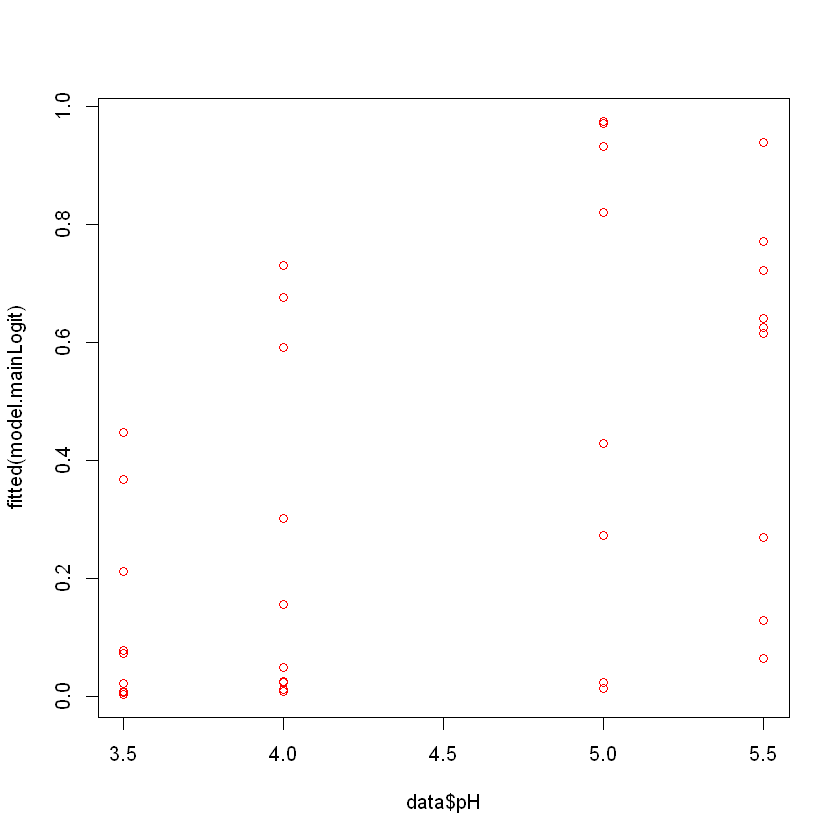

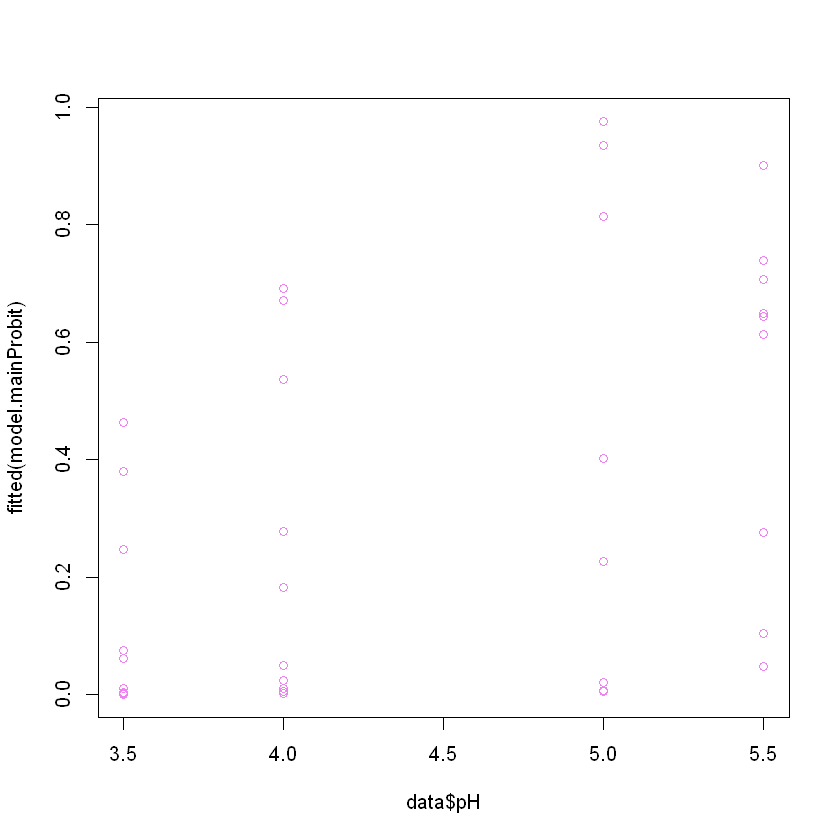

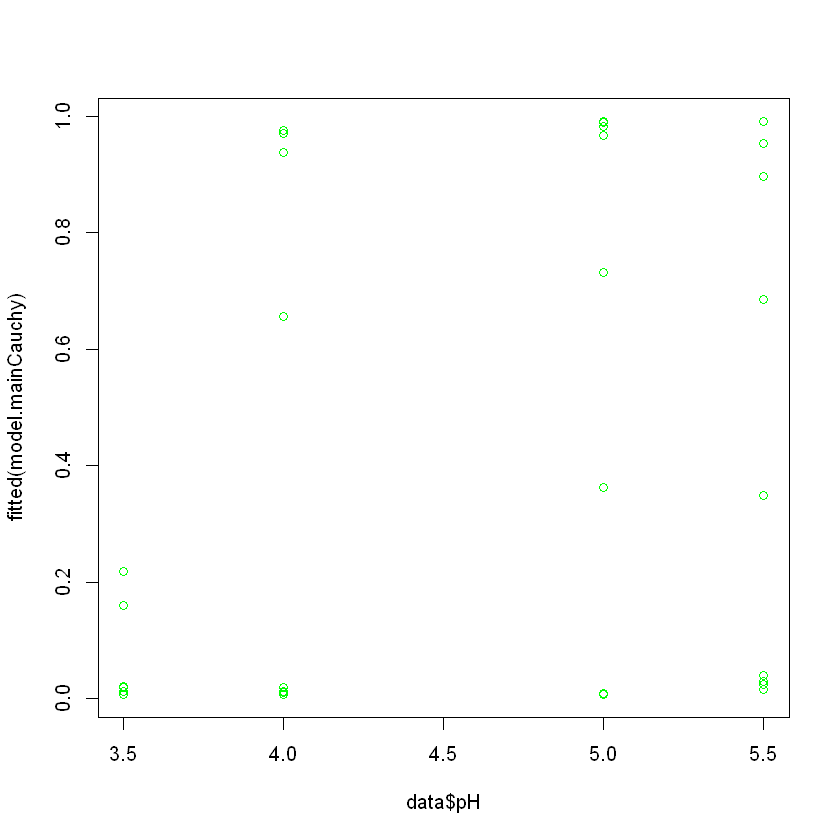

[1] 62.33065

[1] 62.01991

[1] 55.77466

[1] 64.70107

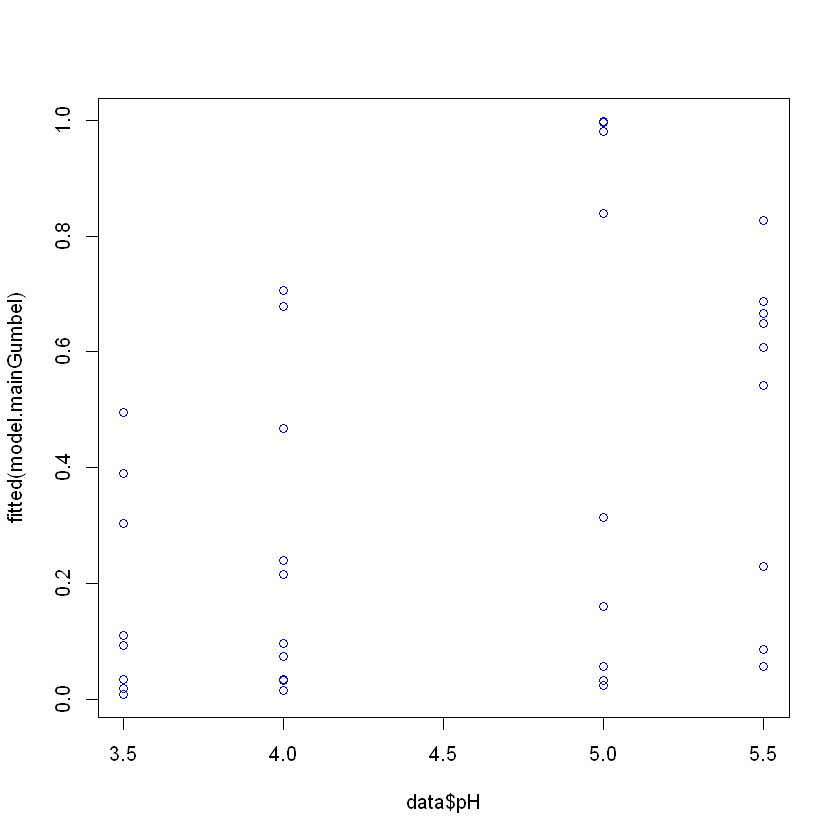

In [9]:
### 2
data<-read.table("applejuiceCRA7152.txt", sep="\t", dec=".", header=TRUE)
attach(data)

### a)

model.mainLogit<-glm(Growth~pH+Nisin+Temperature+Brix, family=binomial(link="logit"), data=data)
summary(model.mainLogit)

model.mainProbit<-glm(Growth~pH+Nisin+Temperature+Brix, family=binomial(link="probit"), data=data)
summary(model.mainProbit)

model.mainCauchy<-glm(Growth~pH+Nisin+Temperature+Brix, family=binomial(link="cauchit"), data=data, maxit=100)
summary(model.mainCauchy)

model.mainGumbel<-glm(Growth~pH+Nisin+Temperature+Brix, family=binomial(link="cloglog"), data=data, maxit=500)
summary(model.mainGumbel)

plot(data$pH, fitted(model.mainLogit), col="red")
plot(data$pH, fitted(model.mainProbit), col="violet")
plot(data$pH, fitted(model.mainCauchy), col="green")
plot(data$pH, fitted(model.mainGumbel), col="blue")

AIC(model.mainLogit)
AIC(model.mainProbit)
AIC(model.mainCauchy)
AIC(model.mainGumbel)

# > AIC(model.mainLogit)
# [1] 62.33065
# > AIC(model.mainProbit)
# [1] 62.01991
# > AIC(model.mainCauchy)
# [1] 55.77467
# > AIC(model.mainGumbel)
# [1] 65.16154

# iv) Cauchy link

In [10]:
### b)

newdata<-data.frame(pH=4.5, Nisin=20, Temperature=30, Brix=17)
predict(model.mainCauchy, newdata=newdata, type="response")
# 0.02008005

1 
0.02002525

In [11]:
### c)

newdata<-data.frame(pH=4.5,Nisin=20,Temperature=30,Brix=17)
predict(model.mainLogit, newdata=newdata, type="response") # point prediction
 
# 0.1118623

eta<-predict(model.mainLogit, newdata=newdata, type="link", se.fit = TRUE) 
link.lowerbound<-eta$fit-qnorm(0.975)*eta$se.fit
link.upperbound<-eta$fit+qnorm(0.975)*eta$se.fit

# logit
lowerbound<-exp(link.lowerbound)/(1+exp(link.lowerbound))
upperbound<-exp(link.upperbound)/(1+exp(link.upperbound))
lowerbound
upperbound

# > lowerbound
# 1 
# 0.02356688 
# > upperbound
# 1 
# 0.3966002 

# another way
plogis(link.lowerbound)
plogis(link.upperbound)

# > plogis(link.lowerbound)
# 1 
# 0.02356688 
# > plogis(link.upperbound)
# 1 
# 0.3966002 


# probit

newdata<-data.frame(pH=4.5,Nisin=20,Temperature=30,Brix=17)
eta<-predict(model.mainProbit, newdata=newdata, type="link", se.fit = TRUE) 
link.lowerbound<-eta$fit-qnorm(0.975)*eta$se.fit
link.upperbound<-eta$fit+qnorm(0.975)*eta$se.fit


pnorm(link.lowerbound)
pnorm(link.upperbound)

# > pnorm(link.lowerbound)
# 1 
# 0.01412712 
# > pnorm(link.upperbound)
# 1 
# 0.3609346 


# Cauchy
newdata<-data.frame(pH=4.5,Nisin=20,Temperature=30,Brix=17)
eta<-predict(model.mainCauchy, newdata=newdata, type="link", se.fit = TRUE) 
link.lowerbound<-eta$fit-qnorm(0.975)*eta$se.fit
link.upperbound<-eta$fit+qnorm(0.975)*eta$se.fit

pcauchy(link.lowerbound)
pcauchy(link.upperbound)

# > pcauchy(link.lowerbound)
# 1 
# 0.009010938 
# > pcauchy(link.upperbound)
# 1 
# 0.9129844

1 
0.1118623

1 
0.02356688

1 
0.3966002

1 
0.02356688

1 
0.3966002

1 
0.01412712

1 
0.3609346

1 
0.009010938

1 
0.9129844

In [12]:
### d)

newdata<-data.frame(pH=4.5,Nisin=20,Temperature=30,Brix=17)

mu.f<-predict(model.mainLogit, newdata=newdata, type="response") # 0.1118623
YS.pred<-100*mu.f # 11.18623 apple juices

mu.hat<-predict(model.mainLogit, newdata=data, type="response")
n<-dim(data)[1]

e.b<-numeric()

for(b in 1:1000){
  
  yb<-numeric()
  for(i in 1:n){
    
    yb[i]<-sample(0:1,1,prob=c(1-mu.hat[i],mu.hat[i]))
    
  }
  
  model.b<-glm(yb~pH+Nisin+Temperature+Brix, family=binomial(link="logit"), data=data)
  newdata<-data.frame(pH=4.5,Nisin=20,Temperature=30,Brix=17)
  mu.fb<-predict(model.b, newdata=newdata, type="response")
  YS.predB<-100*mu.fb
  
  yf.b<-sample(0:1,100,prob=c(1-mu.f,mu.f), replace=TRUE)
  
  e.b[b]<-sum(yf.b)-YS.predB
  
}

var.error<-var(e.b)
var.error

z<-qnorm(c(0.1), lower.tail=FALSE)
lower.bound<-YS.pred-z*sqrt(var.error)
upper.bound<-YS.pred+z*sqrt(var.error)
lower.bound
upper.bound

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


[1] 79.94541

1 
-0.2724001

1 
22.64487

In [13]:
### e)
model.mainEffect<-glm(Growth~pH+Nisin+Temperature+Brix, family=binomial(link="cauchit"), data=data)
summary(model.mainEffect)

model.interact<-glm(Growth~pH+Nisin+Temperature+Brix+pH:Nisin+pH:Temperature
              +pH:Brix+Nisin:Temperature+Nisin:Brix+Temperature:Brix, family=binomial(link="cauchit"), data=data)
summary(model.interact)

AIC(model.mainEffect)
AIC(model.interact)

# > AIC(model.mainEffect)
# [1] 55.77467
# > AIC(model.interact)
# [1] 22.00001
# >

# ii)


Warning message:
"glm.fit: algorithm did not converge"



Call:
glm(formula = Growth ~ pH + Nisin + Temperature + Brix, family = binomial(link = "cauchit"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0726  -0.1945  -0.1230   0.2195   2.7178  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) -83.1930    50.6592  -1.642    0.101
pH           13.5820     8.3332   1.630    0.103
Nisin        -0.6614     0.4117  -1.607    0.108
Temperature   1.3624     0.8415   1.619    0.105
Brix         -1.2589     0.8425  -1.494    0.135

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 95.945  on 73  degrees of freedom
Residual deviance: 45.775  on 69  degrees of freedom
AIC: 55.775

Number of Fisher Scoring iterations: 25


Warning message:
"glm.fit: algorithm did not converge"



Call:
glm(formula = Growth ~ pH + Nisin + Temperature + Brix + pH:Nisin + 
    pH:Temperature + pH:Brix + Nisin:Temperature + Nisin:Brix + 
    Temperature:Brix, family = binomial(link = "cauchit"), data = data)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-5.318e-04  -1.483e-04  -7.942e-05   1.187e-04   6.247e-04  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.132e+09  2.827e+11  -0.004    0.997
pH                 1.807e+08  4.711e+10   0.004    0.997
Nisin             -5.354e+06  1.618e+09  -0.003    0.997
Temperature        1.795e+07  4.279e+09   0.004    0.997
Brix               4.241e+07  1.215e+10   0.003    0.997
pH:Nisin           2.800e+05  3.100e+08   0.001    0.999
pH:Temperature    -1.176e+06  5.424e+08  -0.002    0.998
pH:Brix           -6.989e+06  2.125e+09  -0.003    0.997
Nisin:Temperature -4.416e+04  1.376e+07  -0.003    0.997
Nisin:Brix         3.080e+05  8.811e+07   0.003    0.997
T

[1] 55.77467

[1] 22.00001